In [27]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')
%matplotlib inline

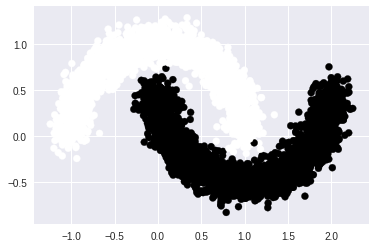

In [28]:
X,y = datasets.make_moons(n_samples=5000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [29]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 3)
        self.l2 = torch.nn.Linear(3, 3)
        self.l3 = torch.nn.Linear(3, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3   


In [30]:
m = torch.nn.Linear(2, 4, bias=True)
print(m.weight)
print(m.bias)

Parameter containing:
tensor([[ 0.2909, -0.4215],
        [ 0.0980, -0.3628],
        [-0.2252, -0.1006],
        [-0.1725, -0.4180]], requires_grad=True)
Parameter containing:
tensor([-0.5003,  0.2174, -0.1985, -0.1257], requires_grad=True)


In [31]:
model = NeuralNetwork()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
model.to(device)

NeuralNetwork(
  (l1): Linear(in_features=2, out_features=3, bias=True)
  (l2): Linear(in_features=3, out_features=3, bias=True)
  (l3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [32]:
inputs = torch.tensor(X, dtype=torch.float).to(device=device)
labels = torch.tensor(y, dtype=torch.float).to(device=device)

In [34]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [35]:
#store all the loss values
losses = []

In [36]:
for epoch in range(10000):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


0 0.7104895710945129
500 0.0023810958955436945
1000 0.0019616917707026005
1500 0.0017441562376916409
2000 0.001563084777444601
2500 0.0014014140469953418
3000 0.001260584220290184
3500 0.0011426054406911135
4000 0.0010443743085488677
4500 0.0009617223986424506
5000 0.0008874259074218571
5500 0.0008267819648608565
6000 0.0007790321251377463
6500 0.0007569590816274285
7000 0.000732925720512867
7500 0.000712554669007659
8000 0.0006942570907995105
8500 0.0006771510816179216
9000 0.0006604326190426946
9500 0.0006432014633901417


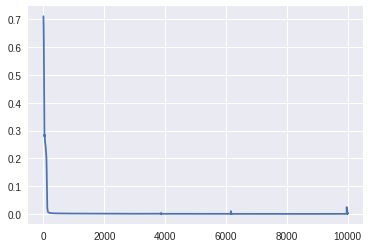

In [37]:
plt.plot(losses)

tensor([[1.]], device='cuda:0', grad_fn=<SigmoidBackward>)


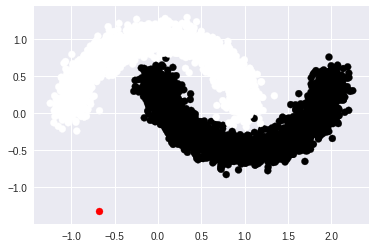

In [49]:
test = torch.randn(1,2, dtype=torch.float).to(device=device)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()